In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string

In [2]:
#import the dataset
df1=pd.read_csv("D:\Techmiya\PRoject\Datasets\hatespeech\labeled_data.csv")
df2=pd.read_csv("HOT_preprocessed_data.csv")

In [3]:
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
#Doing some adjustments

c=df1['class']
df1.rename(columns={'tweet' : 'text',
                   'class' : 'category'}, 
                    inplace=True)
a=df1['text']
b=df1['category'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})

df= pd.concat([a,b,c], axis=1)
df.rename(columns={'class' : 'label'}, 
                    inplace=True)
df

,text,category,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,1
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language,1
24779,"you've gone and broke the wrong heart baby, an...",neither,2
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language,1
24781,youu got wild bitches tellin you lies,offensive_language,1


In [5]:
# Grouping data by label
df.groupby('label').count()

,text,category
label,,
0,1430,1430
1,19190,19190
2,4163,4163


In [6]:
df2.head()

,old_text,score,text
0,haa,0,ha
1,banti empowered woman feminism gyan pelti din ...,2,banti empowered adult female feminism gyan pel...
2,usko chhod mjse bat baap gya ldki beech madarchod,2,usko chhod mjse words father gya ldki midway m...
3,punjab madarchodon khila nokrian day imran,2,punjab mother fucker khila nokrian day imran
4,chill maar madarchod gand maar lene,2,chill kill motherfucker ass kill lene


In [7]:
#Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
df2['score'] = df2['score'].replace([0,1,2],[2,0,1])

In [8]:
df2.head()

,old_text,score,text
0,haa,2,ha
1,banti empowered woman feminism gyan pelti din ...,1,banti empowered adult female feminism gyan pel...
2,usko chhod mjse bat baap gya ldki beech madarchod,1,usko chhod mjse words father gya ldki midway m...
3,punjab madarchodon khila nokrian day imran,1,punjab mother fucker khila nokrian day imran
4,chill maar madarchod gand maar lene,1,chill kill motherfucker ass kill lene


In [9]:
df=df.drop(['category'],axis=1)

In [10]:
df2=df2.drop(['old_text'],axis=1)

In [11]:
df2

,score,text
0,2,ha
1,1,banti empowered adult female feminism gyan pel...
2,1,usko chhod mjse words father gya ldki midway m...
3,1,punjab mother fucker khila nokrian day imran
4,1,chill kill motherfucker ass kill lene
...,...,...
2998,0,islamic kashmiri muslim terrorist pig jisk
2999,0,love muslim terrorist killed
3000,0,mother fucker whore aullad islamic muslim ter...
3001,0,muslim terrorist dog double end aane


In [12]:
df2.rename(columns = {'score':'label'}, inplace = True)

In [13]:
df2

,label,text
0,2,ha
1,1,banti empowered adult female feminism gyan pel...
2,1,usko chhod mjse words father gya ldki midway m...
3,1,punjab mother fucker khila nokrian day imran
4,1,chill kill motherfucker ass kill lene
...,...,...
2998,0,islamic kashmiri muslim terrorist pig jisk
2999,0,love muslim terrorist killed
3000,0,mother fucker whore aullad islamic muslim ter...
3001,0,muslim terrorist dog double end aane


In [14]:
data = pd.concat([df,df2]) 

In [15]:
data

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
2998,islamic kashmiri muslim terrorist pig jisk,0
2999,love muslim terrorist killed,0
3000,mother fucker whore aullad islamic muslim ter...,0
3001,muslim terrorist dog double end aane,0


In [16]:
# Grouping data by label
data.groupby('label').count()

,text
label,
0,1732
1,20951
2,5103


In [17]:
data['label'].unique()

array([2, 1, 0], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

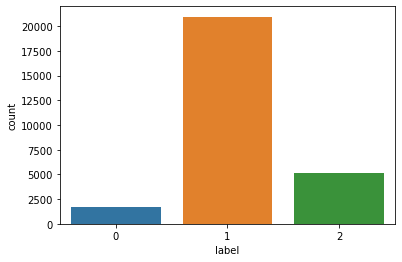

In [18]:
import seaborn as sns
sns.countplot('label',data=data)

# Cleaning the texts

In [19]:
#Creating a copy 
clean_reviews=data.copy()

In [20]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [21]:
data['text']=data['text'].apply(lambda x:review_cleaning(x))
data.head()

,text,label
0,rt mayasolovely as a woman you shouldnt compl...,2
1,rt boy dats coldtyga dwn bad for cuffin dat ...,1
2,rt urkindofbrand dawg rt you ever fuck a bit...,1
3,rt cganderson vivabased she look like a tranny,1
4,rt shenikaroberts the shit you hear about me ...,1


In [22]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [23]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()


,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [24]:
#Separating input feature and label
X=data.text
y=data.label

# spliting the dataset for train and test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

# Transforming Dataset using TF-IDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=25000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  25000


In [27]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
#Random Forest
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print(classification_report(y_test, y_pred_rf))

[[  81  202   45]
 [  44 4046  121]
 [  13  197  809]]
              precision    recall  f1-score   support

           0       0.59      0.25      0.35       328
           1       0.91      0.96      0.93      4211
           2       0.83      0.79      0.81      1019

    accuracy                           0.89      5558
   macro avg       0.78      0.67      0.70      5558
weighted avg       0.88      0.89      0.88      5558



In [31]:
from sklearn.neighbors import KNeighborsClassifier 
#apply knn algorithm
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [32]:
print(cm)

[[  31   35  262]
 [  25  890 3296]
 [   2   71  946]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.09      0.16       328
           1       0.89      0.21      0.34      4211
           2       0.21      0.93      0.34      1019

    accuracy                           0.34      5558
   macro avg       0.55      0.41      0.28      5558
weighted avg       0.75      0.34      0.33      5558



In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
#Decision Tree
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
print(classification_report(y_test, y_pred_dt))

[[ 115  177   36]
 [ 131 3926  154]
 [  32  165  822]]
              precision    recall  f1-score   support

           0       0.41      0.35      0.38       328
           1       0.92      0.93      0.93      4211
           2       0.81      0.81      0.81      1019

    accuracy                           0.87      5558
   macro avg       0.72      0.70      0.71      5558
weighted avg       0.87      0.87      0.87      5558



In [36]:
#naviebias
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_prednb = mnb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_prednb, y_test)))
score_mnbt = round(accuracy_score(y_prednb,y_test)*100,2)

Accuracy : 0.805865


In [37]:
#SVC classifier
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_predsv = SVCmodel.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_predsv, y_test)))
score_svt = round(accuracy_score(y_predsv,y_test)*100,2)

Accuracy : 0.894746


In [38]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.5)
# Train Adaboost Classifer
ada = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ada.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.07      0.13       328
           1       0.94      0.89      0.92      4211
           2       0.65      0.95      0.77      1019

    accuracy                           0.86      5558
   macro avg       0.72      0.64      0.60      5558
weighted avg       0.86      0.86      0.84      5558

[[  23  215   90]
 [   7 3766  438]
 [  10   38  971]]


In [40]:
#XGBOOST
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
    
xgb_clf.fit(X_train,y_train)
y_pred_XG = xgb_clf.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
print(confusion_matrix(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))
print(accuracy_score(y_test,y_pred_XG)*100)
score_svm = accuracy_score(y_test,y_pred_XG)*100

[[  77  168   83]
 [  34 3854  323]
 [  11   40  968]]
              precision    recall  f1-score   support

           0       0.63      0.23      0.34       328
           1       0.95      0.92      0.93      4211
           2       0.70      0.95      0.81      1019

    accuracy                           0.88      5558
   macro avg       0.76      0.70      0.69      5558
weighted avg       0.89      0.88      0.87      5558

88.1432169845268


# CountVectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# Create word vector (count)
CountVector = CountVectorizer(max_features=2000)

X = CountVector.fit_transform(data.text).toarray()
y = data.label.values

print(X.shape, y.shape)

(27786, 2000) (27786,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)
print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (22228, 2000) and their label's shape (22228,)
X test data has shape (5558, 2000) and their label's shape (5558,)


In [44]:
#Predict using RandomForest
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = rf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))
score_rf = round(accuracy_score(y_pred,y_test)*100,2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_prednb = mnb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_prednb, y_test)))
score_nb = round(accuracy_score(y_prednb,y_test)*100,2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
y_predlr = mnb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_predlr, y_test)))
score_lr = round(accuracy_score(y_predlr,y_test)*100,2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=25)
tree_clf.fit(X_train, y_train)

In [ ]:
y_preddt = tree_clf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_preddt, y_test)))
score_dt = round(accuracy_score(y_preddt,y_test)*100,2)


In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

In [ ]:
y_predsv = SVCmodel.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_predsv, y_test)))
score_svt = round(accuracy_score(y_predsv,y_test)*100,2)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.5)
# Train Adaboost Classifer
ada = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
#XGBOOST
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
    
xgb_clf.fit(X_train,y_train)
y_pred_XG = xgb_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))
print(accuracy_score(y_test,y_pred_XG)*100)
score_svm = accuracy_score(y_test,y_pred_XG)*100

# Ensemble 

In [51]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
#nbclf = GaussianNB(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('log', LogisticRegression(random_state=0))],
                 voting='soft')

In [52]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf2.predict(X_train)

accuracy_score_VC_train = accuracy_score(x_actual, x_pred)

print('The accuracy score of Voting classifier on TRAIN is : ',round(accuracy_score_VC_train * 100,2), '%')

The accuracy score of Voting classifier on TRAIN is :  96.09 %


In [53]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  89.6 %


In [54]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
nbclf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('NB', nbclf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('NB', GaussianNB())],
                 voting='soft')

In [55]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  88.07 %


In [56]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

#rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
nbclf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('NB',nbclf), ('svm',svmClf), ('XB', xgb_clf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('XB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05,
                                            max_delta_step=None, max_depth=3,
                                            min_child_weight=None, missing=nan,
                                            monotone_const

In [57]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  87.41 %


In [58]:
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(algorithm="auto",n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)
y_pred_WKNN  = clf_WKNN.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred_WKNN, y_test)))
score_WKNN = round(accuracy_score(y_pred_WKNN,y_test)*100,2)
score_WKNN = accuracy_score(y_pred_WKNN,y_test)
score_WKNN

Accuracy : 0.855703


0.8557034904641958

In [45]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(algorithm="auto",n_neighbors=13,weights='distance')
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.5)

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)


# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('AB',abc), ('XG',xgb_clf), ('WKNN', clf_WKNN)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('AB', AdaBoostClassifier(learning_rate=0.5)),
                             ('XG',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05,
                                            max_delta_step=None, max_depth=3,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                       

In [46]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  87.32 %


In [34]:
#ann classifier
#Initialising ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=3,activation="softmax"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100


ValueError: in user code:

    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [28]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
# logClf = LogisticRegression(random_state=0)
#nbclf = GaussianNB(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0))],
                 voting='soft')

In [29]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  90.7 %


In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)   
kmeans.fit(X_train, y_train)
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, kmeans.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  32.37 %
